<a href="https://colab.research.google.com/github/Franco-Urrutia-G/EIE401-1s-2024/blob/main/Actividades/Proyecto1/Proyecto1_UrrutiaFranco-18916762-8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Proyecto 1</h2></center>
<center><h3>Procesamiento digital de señales</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Franco Urrutia Ghiardo</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


Debes usar el sitio https://gwosc.org/eventapi/html/GWTC/, donde encuentras todo el catálogo de observaciones con los datos en diferentes formatos. Debes seleccionar una detección para tu estudio y descargar los datos correspondientes (H5 o TXT), lo que posteriormente deberás tratar de manera digital como audio (serie de tiempo).
tip: Te recomiendo tomar la serie de tiempo corta (32 segundos) para facilitar el análisis, y asegurarte de tomar la tasa de muestreo más alta.
tip: Asegúrate de tomar un caso cuyo espectrograma de muestra, indique una señal clara y fuerte para facilitar tu trabajo, de otra forma es posible que no logres aislarla lo suficiente.


## 1. Carga de Datos


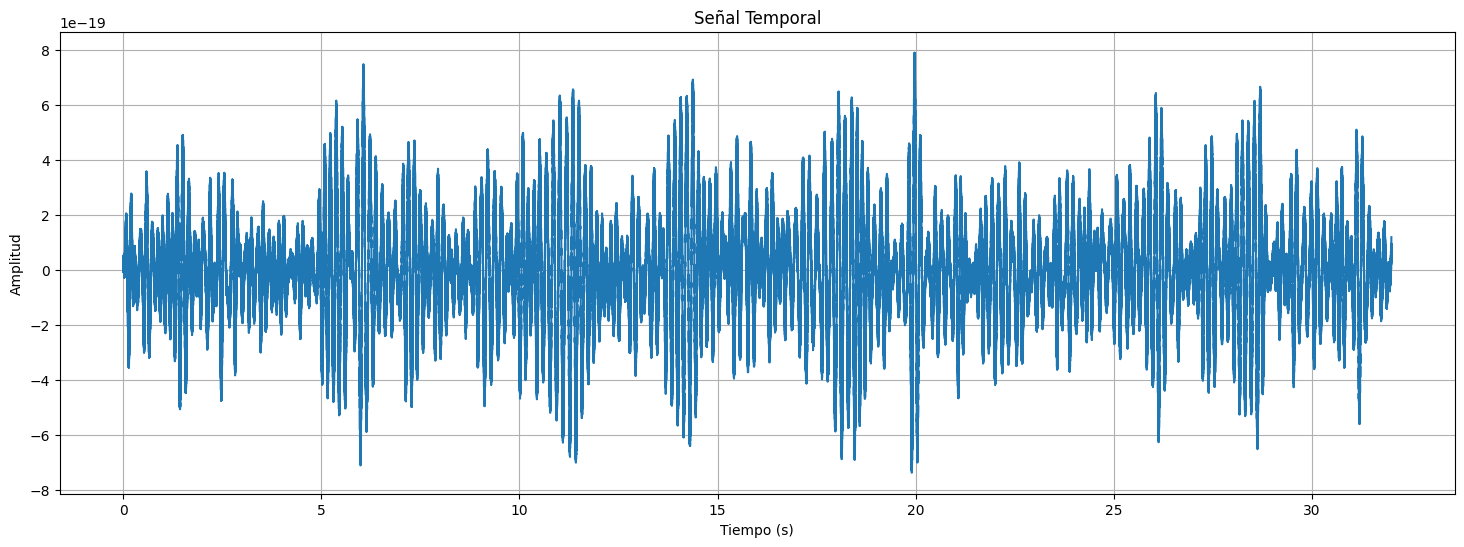

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo TXT
datos = np.loadtxt('/content/H-H1_GWOSC_16KHZ_R1-1126259447-32.txt', skiprows=3)

# Frecuencia de muestreo y duración de la señal
fs = 16384  # Frecuencia de muestreo en Hz
duration = 32  # Duración de la señal en segundos

# Crear un array de tiempo
time = np.arange(0, duration, 1/fs)

# Crear la figura y aumentar el tamaño del gráfico
plt.figure(figsize=(18, 6))

# Graficar los datos
plt.plot(time, datos)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Temporal')
plt.grid(True)
plt.show()


## 2. Convertir en audio
Es una forma de validar que tenemos un alto componente de ruido en la señal y que el interés es eliminarlo para encontrar una señal candidata.

Te recomiendo hacer una señal de audio de cada uno de las etapas para así validar como va el proceso. Al final deberás obtener un señal con CHIRP o BUMP. Son sonidos que comprueban que tienes una cantidad de potencia que sobre destaca sobre el ruido.

In [ ]:
from scipy.io import wavfile
from IPython.display import Audio

def reproducir_audio(señal,fs):
    fs=16384
    # Escalar la señal para que esté en el rango adecuado para audio (entre -1 y 1)
    señal_normalizada = np.int16(señal / np.max(np.abs(señal)) * 32767)

    # Guardar la señal como archivo WAV temporal
    wavfile.write('audio.wav', fs, señal_normalizada)

    # Reproducir el archivo WAV
    display(Audio('audio.wav'))

# Llamada a la función para convertir la señal a audio y reproducirla
reproducir_audio(datos,fs)


## 3. Análisis de Fourier
Al realizar la conversión, queremos ver cuales son las componentes de ruido que más afectan al instrumento y debemos ignorar en el análisis. Eso se ve como "pico" o la apariencia de "peine".
Se debe presenta la densidad espectral de potencia antes y después de la función de Windowing.


## 3.1 Aplicación ventana

<ipython-input-96-84c00081b66b>:7: DeprecationWarning: Importing tukey from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.tukey' or the convenience function 'scipy.signal.get_window' instead.
  ventana = tukey(len(señal), alpha=alpha)


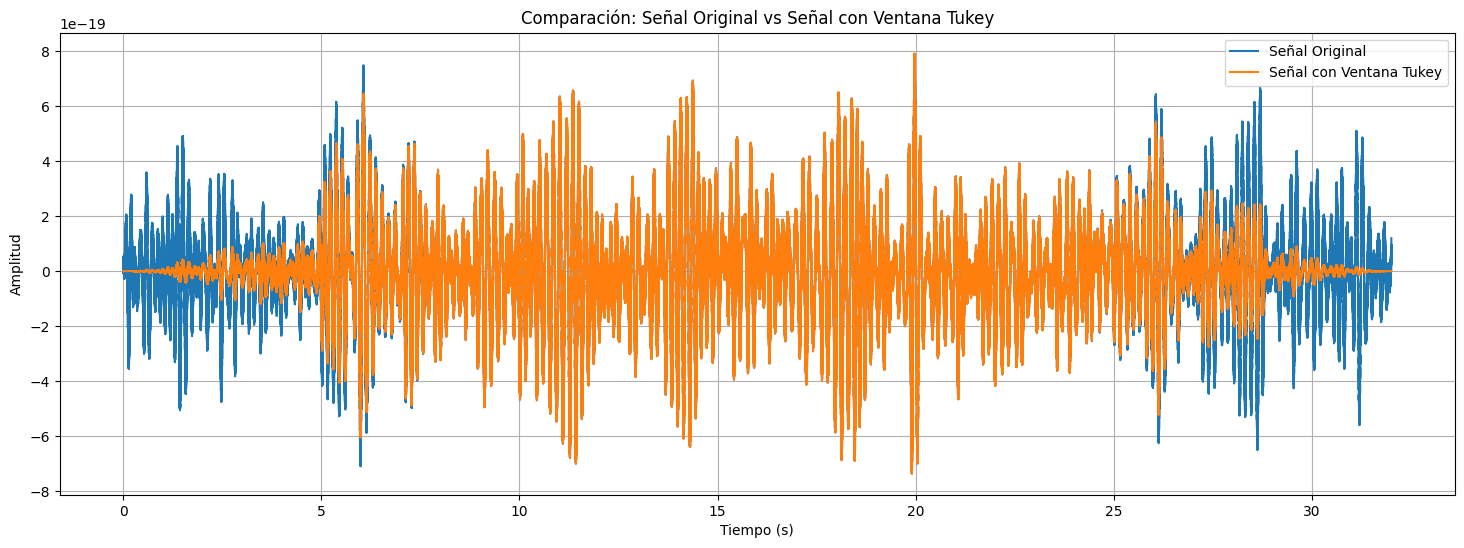

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import tukey, butter, filtfilt, welch
from scipy.fftpack import fft, ifft

def aplicar_ventana_tukey(señal, alpha):
    ventana = tukey(len(señal), alpha=alpha)
    señal_ventaneada = señal * ventana
    return señal_ventaneada

# Definir el parámetro alpha para la ventana Tukey (0 significa una ventana rectangular
#, 1 significa una ventana Hamming)
alpha = 0.5
# Aplicar la ventana Tukey a la señal original
señal_ventaneada_tukey = aplicar_ventana_tukey(datos, alpha)


# Graficar la señal original y la señal con ventana Tukey
plt.figure(figsize=(18, 6))
plt.plot(time, datos, label='Señal Original')
plt.plot(time, señal_ventaneada_tukey, label='Señal con Ventana Tukey')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Comparación: Señal Original vs Señal con Ventana Tukey')
plt.legend()
plt.grid(True)
plt.show()

reproducir_audio(señal_ventaneada_tukey,fs)

## 3.2 PSD señales


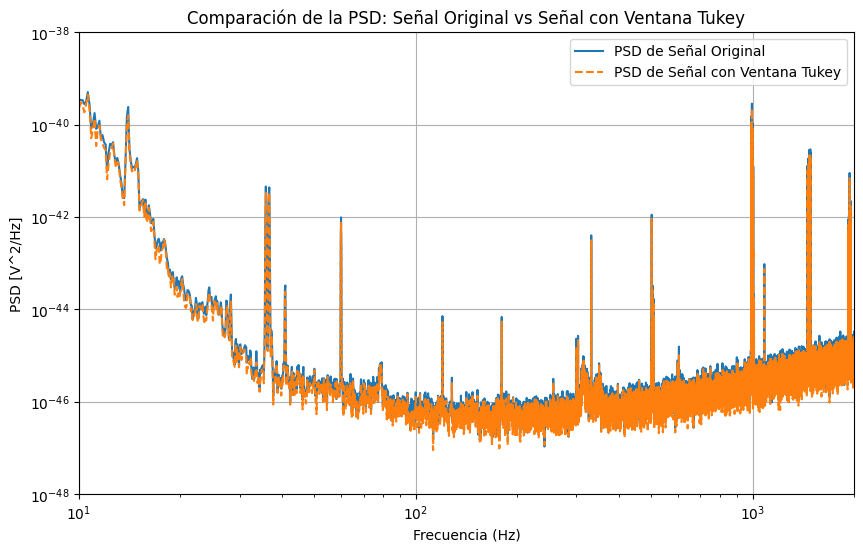

In [ ]:
import numpy as np
from scipy.signal import welch, tukey
import matplotlib.pyplot as plt

fs = 16384  # Frecuencia de muestreo en Hz


# Calcular la PSD usando scipy.signal.welch
frequencies_original, Pxx_original = welch(datos, fs=fs, nperseg=8*fs,noverlap=4*fs)
frequencies_tukey, Pxx_tukey = welch(señal_ventaneada_tukey, fs=fs, nperseg=8*fs,noverlap=4*fs)

#se calcula la psd con metodo de welch usando muestras de 8 segundos (8*fs)
#con un overlap de 4 segundos (default de welch y recomendado en documenta)

# Graficar la PSD de ambas señales
plt.figure(figsize=(10, 6))
plt.loglog(frequencies_original, Pxx_original, label='PSD de Señal Original')
plt.loglog(frequencies_tukey, Pxx_tukey, label='PSD de Señal con Ventana Tukey', linestyle='--')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD [V^2/Hz]')
plt.title('Comparación de la PSD: Señal Original vs Señal con Ventana Tukey')
plt.legend()
plt.grid(True)
plt.xlim(10, 2000)
plt.ylim(1e-48, 1e-38)
plt.show()



## 4. Procesamiento
Debes inferir de tu estudio, cual es el proceso que aplican a la señal y reproducirlo. Es posible que cada estudiante llegue a una solución más o menos diferente, pues no hay un código abierto donde esté el procedimiento completo.


## Blanqueamiento de datos

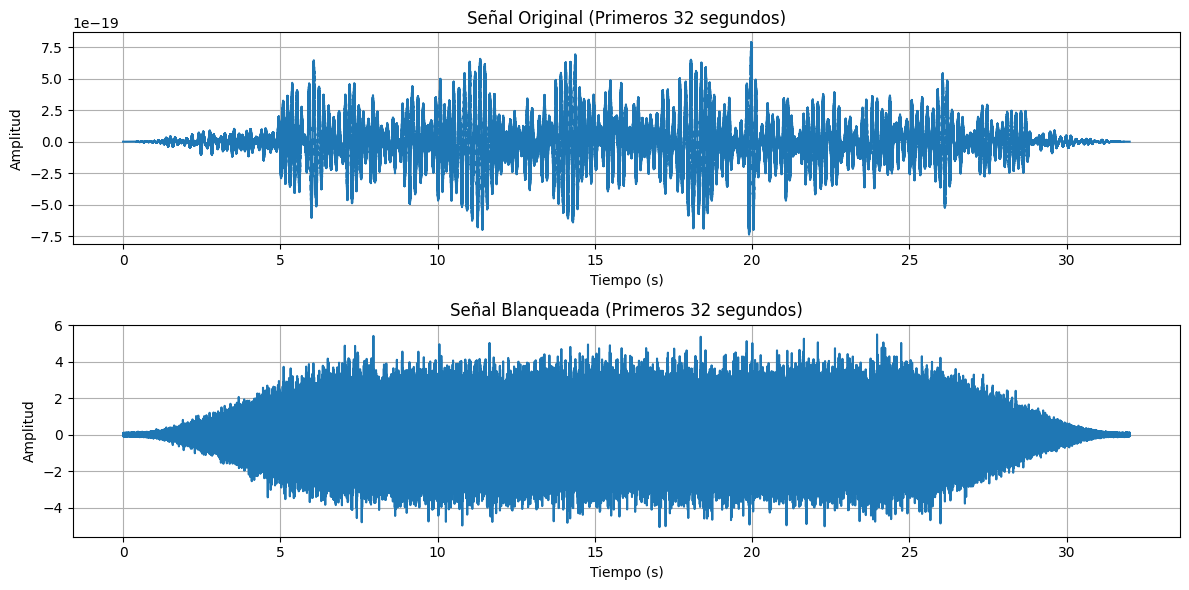

In [ ]:
import numpy as np
from scipy.fft import fft, ifft
from scipy.signal import welch

import matplotlib.pyplot as plt

def escalar_varianza(whitened_samples):

    std_dev = np.std(whitened_samples)  # Calcula la desviación estándar
    scaled_samples = whitened_samples / std_dev  # Escala las muestras
    return scaled_samples



def whiten(datos, fs, nperseg=8*fs):

    # Calcular la PSD utilizando el método de Welch
    freqs, psd = welch(datos, fs, nperseg=nperseg)

    # Realizar la FFT de la señal de entrada
    datos_fft = fft(datos)

    # Crear un interpolador para la PSD
    psd_interp = np.interp(np.fft.fftfreq(len(datos), d=1/fs), freqs, psd)

    # Calcular la respuesta en frecuencia de whitening
    filtro_blanco = 1.0 / np.sqrt(psd_interp)

    # Aplicar la respuesta de whitening a la señal en el dominio de la frecuencia
    fft_datps_blanco = datos_fft * filtro_blanco

    # Transformar de nuevo al dominio del tiempo
    datos_blanco = ifft(fft_datps_blanco)
    # Devolver solo la parte real de la señal blanqueada

    datos_blanco = escalar_varianza(np.real(datos_blanco))
    return datos_blanco

# Definir los parámetros de la señal y las señales de ejemplo
fs = 16384  # Frecuencia de muestreo
t_total = 32  # Duración total de la señal en segundos
t = np.linspace(0, t_total, t_total * fs)  # Vector de tiempo para toda la señal


# Blanquear la señal
señal_blanqueada = whiten(señal_ventaneada_tukey, fs)




# Ajustar la duración para graficar y reproducir (en segundos)
duracion = 32  # Cambia este valor a 1, 3, u otro número de segundos
samples = int(duracion * fs)

# Seleccionar solo los primeros 'duracion' segundos de datos
t_duracion = t[:samples]
señal_ventaneada_tukey_duracion = señal_ventaneada_tukey[:samples]
señal_blanqueada_duracion = señal_blanqueada[:samples]

# Graficar la señal original y la señal blanqueada solo para la duración seleccionada
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t_duracion, señal_ventaneada_tukey_duracion)
plt.title(f"Señal Original (Primeros {duracion} segundos)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t_duracion, señal_blanqueada_duracion)
plt.title(f"Señal Blanqueada (Primeros {duracion} segundos)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()

plt.tight_layout()
plt.show()




# Reproducir el audio de la señal original y la señal blanqueada
reproducir_audio(señal_ventaneada_tukey_duracion,fs)
reproducir_audio(señal_blanqueada_duracion,fs)


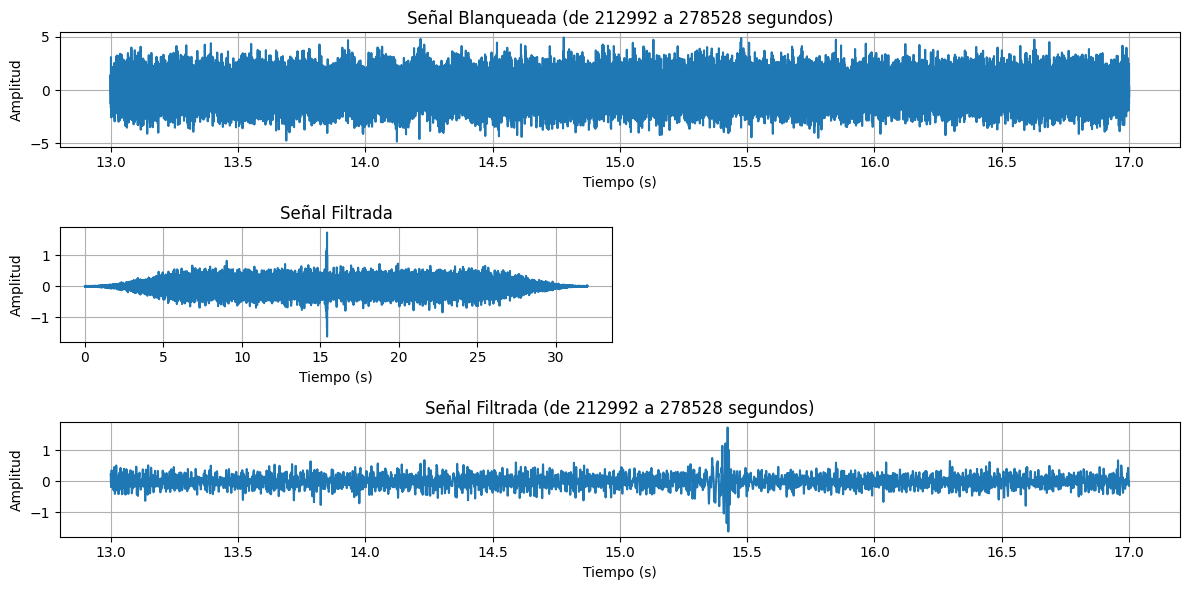

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


import numpy as np
from scipy.signal import welch


# Función para diseñar un filtro pasabanda Butterworth
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist #normalizando frecuencias
    b, a = butter(order, [low, high], btype='band')
    return b, a

#  aplicar el filtro Butterworth
def aplicar_filtro_butterworth(señal, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    señal_filtrada = filtfilt(b, a, señal)
    return señal_filtrada

# Parámetros de la señal
fs = 16384  # Frecuencia de muestreo
t_total = 32  # Duración total de la señal en segundos
t = np.linspace(0, t_total, t_total * fs)  # Vector de tiempo para toda la señal


# Definir las frecuencias de corte del filtro
lowcut = 30.0  # Frecuencia de corte baja en Hz
highcut = 300.0  # Frecuencia de corte alta en Hz

# Aplicar el filtro pasabanda Butterworth a la señal blanqueada
señal_filtrada = aplicar_filtro_butterworth(señal_blanqueada_duracion, lowcut, highcut, fs)

# Parámetros para seleccionar inicio y fin
inicio = 13 # Inicio en segundos
fin =17# Fin en segundos

# Calcular los índices correspondientes
inicio = int(inicio * fs)
fin = int(fin * fs)

# Seleccionar los datos correspondientes
t_duration = t[inicio:fin]
señal_filtrada_duration = señal_filtrada[inicio:fin]
señal_blanqueada_recortda = señal_blanqueada_duracion[inicio:fin]
# Graficar la señal original y la señal blanqueada
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t_duration, señal_blanqueada_recortda)
plt.title(f"Señal Blanqueada (de {inicio} a {fin} segundos)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(t, señal_filtrada)
plt.title("Señal Filtrada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t_duration, señal_filtrada_duration)
plt.title(f"Señal Filtrada (de {inicio} a {fin} segundos)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()


plt.tight_layout()
plt.show()




# Reproducir el audio de la señal original y la señal blanqueada
reproducir_audio(señal_blanqueada_duracion,fs)
reproducir_audio(señal_filtrada_duration,fs)


# Resampling
Para lograr una mejor definición de la señal, se debe hacer un resampleo. Esto tienen consecuencias por eso debe elegirse bien la frecuencia de tal forma que no se introduzca ruido.

In [ ]:
# Resamplear la señal
from scipy.signal import resample
fs=16384
new_fs = fs/2  # Nueva frecuencia de muestreo (por ejemplo, la mitad de la original)
num_samples = int(len(señal_filtrada) * new_fs / fs)
señal_resampleada = resample(señal_filtrada, num_samples)


## Transformada Q constante

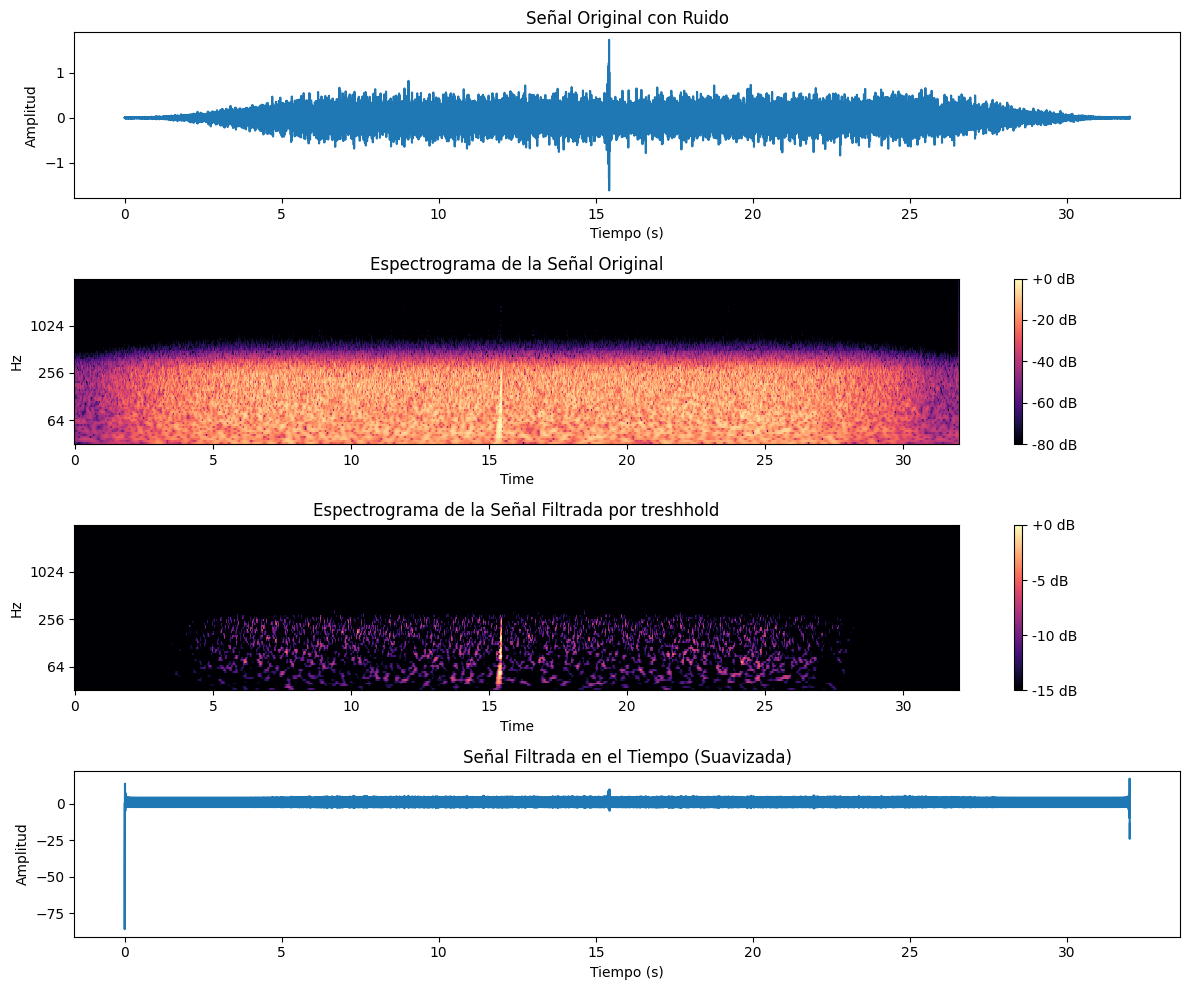

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import butter, filtfilt


def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist #normalizando frecuencias
    b, a = butter(order, [low, high], btype='band')
    return b, a

#  aplicar el filtro Butterworth
def aplicar_filtro_butterworth(señal, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    señal_filtrada = filtfilt(b, a, señal)
    return señal_filtrada


# Parámetros de la señal
fs = 16384  # Frecuencia de muestreo
duracion=32
t = np.arange(0, duration, 1/fs)


# Aplicar la Transformada Q
C = librosa.cqt(señal_filtrada, sr=fs)
C_db = librosa.amplitude_to_db(np.abs(C), ref=np.max)

# Filtrar coeficientes insignificantes
threshold_db = -15  # Umbral en decibeles
C_db_filtered = np.where(C_db < threshold_db, threshold_db, C_db)

# Reconstruir la señal a partir de la Transformada Q
C_filtered = librosa.db_to_amplitude(C_db_filtered, ref=np.max(C))
señal_resampleada = librosa.icqt(C_filtered, sr=fs)



# Aplicar filtro pasa bajas a la señal filtrada
fs=16384
low=50
high = 400  # Frecuencia de corte
señal_resampleada_smooth = aplicar_filtro_butterworth(señal_resampleada, low, high, fs)
# Graficar la señal original, el espectrograma y la señal filtrada
plt.figure(figsize=(12, 10))

# Señal original con ruido
plt.subplot(4, 1, 1)
plt.plot(t, señal_filtrada)
plt.title('Señal Original con Ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Espectrograma de la señal original
plt.subplot(4, 1, 2)
librosa.display.specshow(C_db, sr=fs, x_axis='time', y_axis='cqt_hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de la Señal Original')

# Espectrograma de la señal filtrada
plt.subplot(4, 1, 3)
librosa.display.specshow(C_db_filtered, sr=fs, x_axis='time', y_axis='cqt_hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de la Señal Filtrada por treshhold')

# Señal filtrada en el tiempo
plt.subplot(4, 1, 4)
plt.plot(t, 5*señal_resampleada_smooth)
plt.title('Señal Filtrada en el Tiempo (Suavizada)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()
reproducir_audio(señal_resampleada_smooth,fs)
inicio=15*fs
fin=17*fs
audio_recortado=señal_resampleada_smooth[inicio:fin]
reproducir_audio(audio_recortado,new_fs)